In [3]:
from keras.layers import Input, Lambda, Dense, Flatten

Using TensorFlow backend.


In [4]:
from keras.models import Model

In [38]:
from keras.applications.vgg16 import VGG16

In [39]:
from keras.applications.vgg16 import preprocess_input

In [7]:
from keras.preprocessing import image

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
from keras.models import Sequential

In [10]:
import numpy as np

In [11]:
from glob import glob

In [12]:
import matplotlib.pyplot as plt

In [50]:
import keras

In [13]:
IMAGE_SIZE = [224,224]

In [14]:
train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'

In [15]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
folders = glob('chest_xray/train/*')

In [18]:
x = Flatten()(vgg.output)

In [19]:
prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./225, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./225)

In [23]:
training_set = train_datagen.flow_from_directory('chest_xray/train', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [24]:
test_set = test_datagen.flow_from_directory('chest_xray/test', target_size = (224,224), batch_size = 32, class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [26]:
r = model.fit_generator(training_set, validation_data = test_set, epochs = 1, steps_per_epoch = len(training_set), validation_steps = len(test_set))


Epoch 1/1
 47/163 [=======>......................] - ETA: 12:59 - loss: 0.2948 - accuracy: 0.8843

C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 133 could not be retrieved. It could be because a worker has died.
  UserWarning)


 48/163 [=======>......................] - ETA: 15:17 - loss: 0.2974 - accuracy: 0.8828

C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 53 could not be retrieved. It could be because a worker has died.
  UserWarning)


163/163 [==============================] - 1342s 8s/step - loss: 0.1786 - accuracy: 0.9306 - val_loss: 0.3280 - val_accuracy: 0.8766


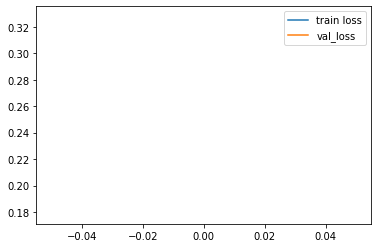

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [44]:
from keras.models import load_model


In [45]:
from keras.preprocessing import image

In [46]:
from keras.applications.vgg16 import preprocess_input

In [47]:
import numpy as np

In [72]:
model = load_model('model_vgg16.h5')
img = image.load_img('chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size = (224,224))


In [73]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)


In [74]:
img_data = preprocess_input(x)
classes = model.predict(img_data)


In [71]:
model.save('model_vgg16.h5')

array([[1., 0.]], dtype=float32)